# Gaussian Mixture Model

In [157]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
import pickle
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from scipy.stats import multivariate_normal as mvn
matplotlib_axes_logger.setLevel('ERROR')
np.random.seed(0)

# Load Data

In [147]:
def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

# Save Data

In [148]:
def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

# Gaussian Mixture Model code has been updated with the missing code mc = Σiric  and πc = mc/m and μc = (1/mc)*Σiricxi and Σc = (1/mc)Σiric(xi−μc)T(xi−μc)

In [125]:
class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(r.shape[0]):
            r_sum = np.sum(r,axis=1)
            r_sum_i = r_sum[i]
            pi_sum = np.sum(self.pi)
            r[i] = r[i]/(pi_sum*r_sum_i)
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            color = ['r', 'g', 'b']
            ax0.scatter(self.X[i],0,c=color[int(i/60)],s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            for c in range(r.shape[1]):
                rsum = np.sum(r[:,c])
                m_c.append(rsum)
            
            """calculate pi_c"""
            for i in range(len(m_c)):
                sum_m_c = np.sum(m_c)
                avg_m_c_i = (m_c[i]/sum_m_c)
                self.pi[i] = avg_m_c_i
            
            """calculate mu_c"""
            X_new = self.X.reshape(self.X.shape[0],1)
            X_new_r = X_new*r
            X_new_sum = np.sum(X_new_r,axis =0)
            self.mu = X_new_sum/m_c


            """calculate var_c"""
            var_c = []
            for c in range(r.shape[1]):
                arr_r = np.array(r[:,c])
                new_arr_r = arr_r.reshape(180,1)
                new_X = self.X.reshape(self.X.shape[0],1)
                X_wo_mu = new_X - self.mu[c]
                temp_ar = (new_arr_r*X_wo_mu)
                var_c.append((1/m_c[c])*np.dot(temp_ar.T,X_wo_mu))


            plt.show()

# Loading data and plotting the graph in each iteration

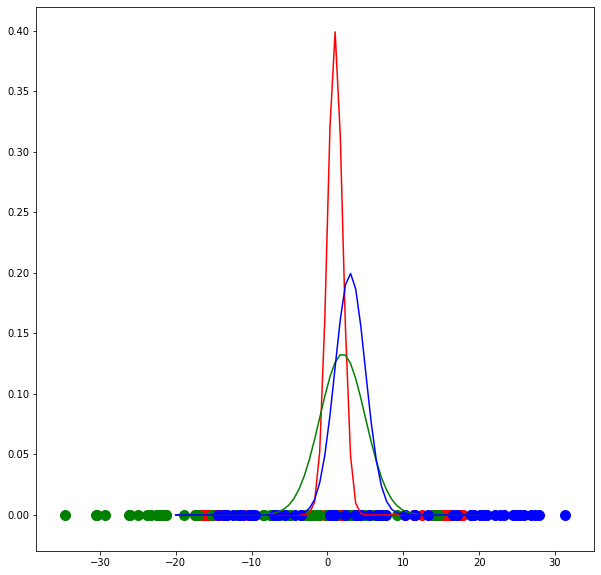

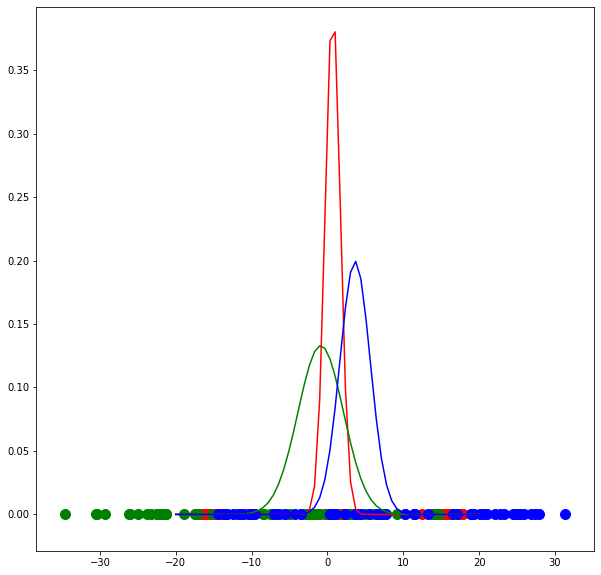

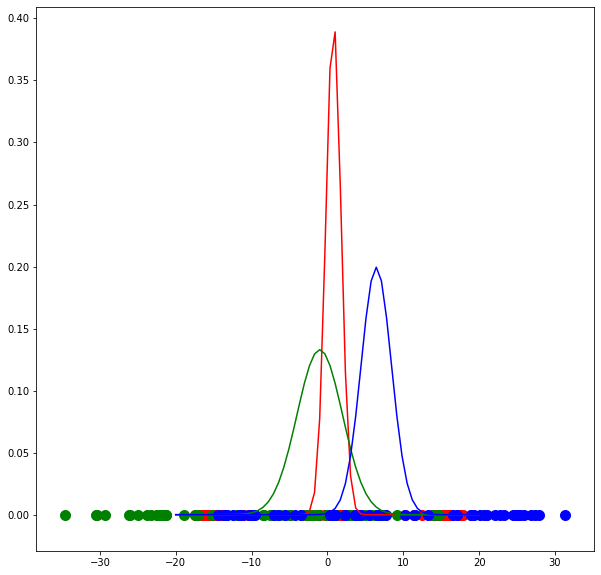

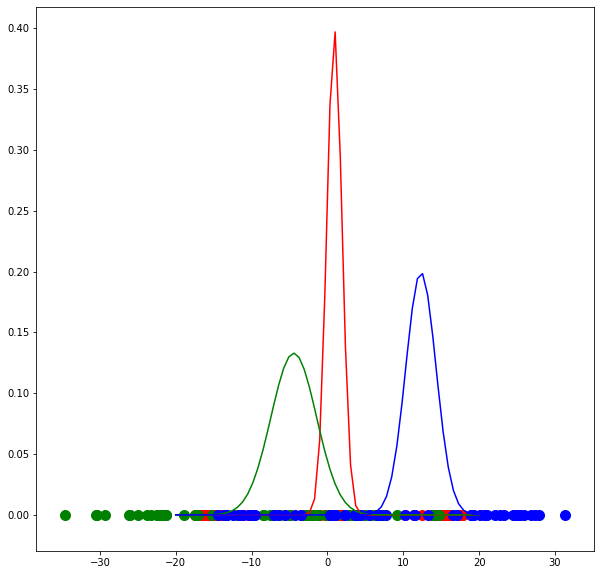

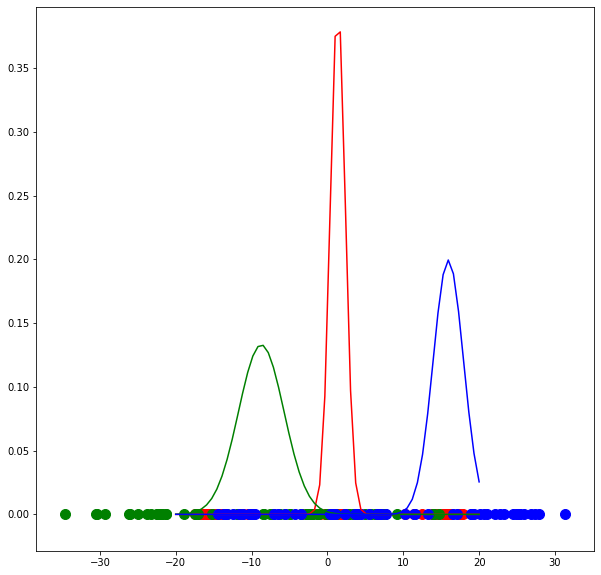

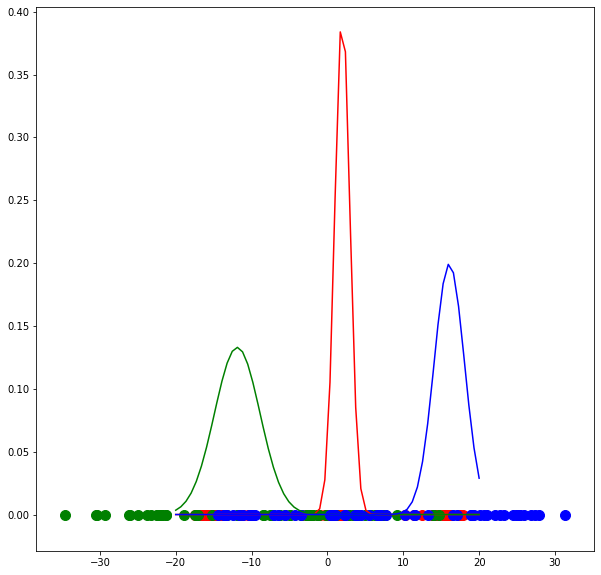

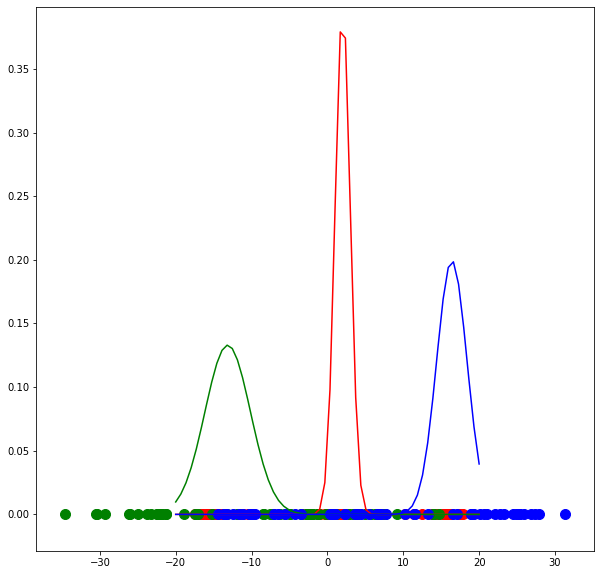

In [126]:
data1 = load('/media/indranil/New Volume/second sem/SMAI/Assignment 2/q2/data/dataset1.pkl')
data2 = load('/media/indranil/New Volume/second sem/SMAI/Assignment 2/q2/data/dataset2.pkl')
data3 = load('/media/indranil/New Volume/second sem/SMAI/Assignment 2/q2/data/dataset3.pkl')
data = np.stack((data1,data2,data3)).flatten()
initmean = [1,2,3]
initprob = [1/3,1/3,1/3]
initvariance = [1,3,2]
gmm1d = GMM1D(data,7,initmean,initprob,initvariance)
gmm1d.run()

# Dataset 1

In [165]:
gmm1 = GaussianMixture(n_components = 3, covariance_type = 'full',max_iter = 2)
data1 = data1.reshape(60,1)
labels = gmm1.fit(data1)

print('converged or not: ', gmm.converged_)

converged or not:  True


# Converged in 2 iterations

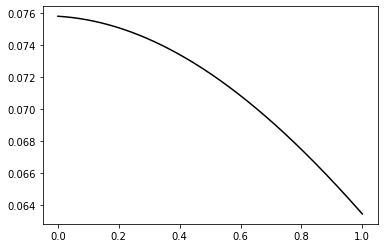

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 1000).reshape(1000,1)
logprob = gmm1.score_samples(x)
pdf = np.exp(logprob)
ax.plot(x, pdf, '-k')
plt.show()

# Plotting three clusters for dataset1 using sklearn gaussian mixture model

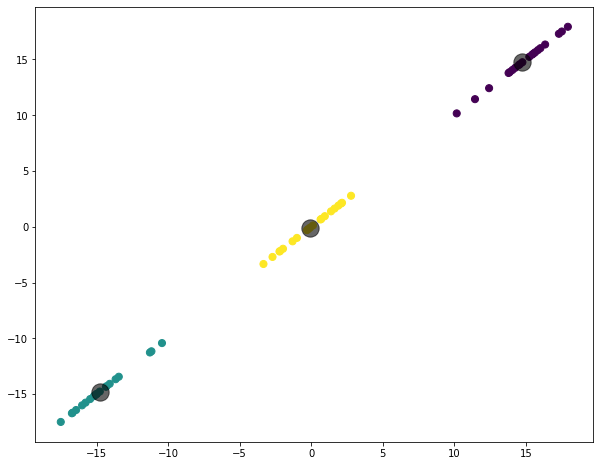

In [169]:
pred_gmm1 = gmm1.predict(data1)
centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm1.covariances_[i], mean=gmm1.means_[i]).logpdf(data1)
    centers[i, :] = data1[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(data1[:, 0], data1[:, 0],c=pred_gmm1 ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 0],c='black', s=300, alpha=0.6)

# Dataset 2

In [170]:
gmm2 = GaussianMixture(n_components = 3,covariance_type = 'full',max_iter = 5)
data2 = data2.reshape(60,1)
labels = gmm2.fit(data2)

print('converged or not: ', gmm2.converged_)

converged or not:  True


# Converged in 5 iterations

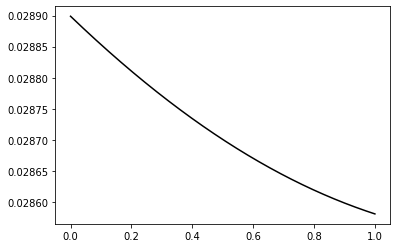

In [171]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 1000).reshape(1000,1)
logprob = gmm2.score_samples(x)
pdf = np.exp(logprob)
ax.plot(x, pdf, '-k')
plt.show()

# Plotting three clusters for dataset2 using sklearn gaussian mixture model

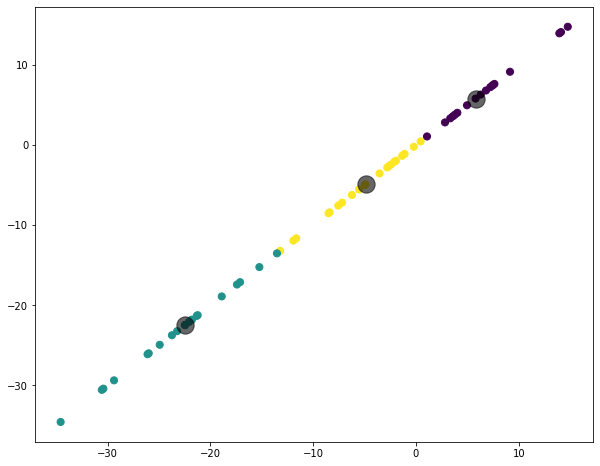

In [176]:
pred_gmm2 = gmm2.predict(data2)
centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm2.covariances_[i], mean=gmm2.means_[i]).logpdf(data2)
    centers[i, :] = data2[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(data2[:, 0], data2[:, 0],c=pred_gmm2 ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 0],c='black', s=300, alpha=0.6)

# Dataset 3

In [177]:
gmm3 = GaussianMixture(n_components = 3, covariance_type = 'full',max_iter = 7)
data3 = data3.reshape(60,1)
labels = gmm3.fit(data3)

print('converged or not: ', gmm3.converged_)

converged or not:  True


# Converged in 7 iterations

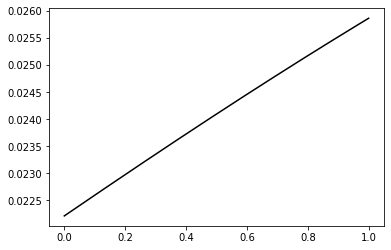

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 1000).reshape(1000,1)
logprob = gmm3.score_samples(x)
pdf = np.exp(logprob)
ax.plot(x, pdf, '-k')
plt.show()

# Plotting three clusters for dataset1 using sklearn gaussian mixture model

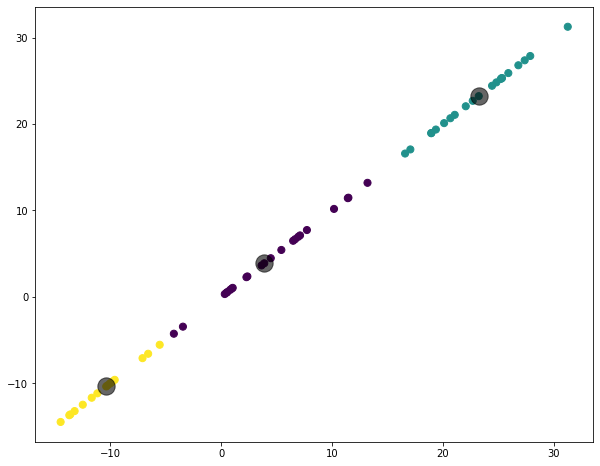

In [179]:
pred_gmm3 = gmm3.predict(data3)
centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm3.covariances_[i], mean=gmm3.means_[i]).logpdf(data3)
    centers[i, :] = data3[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(data3[:, 0], data3[:, 0],c=pred_gmm3 ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 0],c='black', s=300, alpha=0.6)